In [1]:
#Importing of the required Libaries
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from scipy import stats 
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import yfinance as yf

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [2]:
#Section where we retrive our data
end = dt.datetime.now()
start = dt.datetime(2016,1,1)
#Doing 2016 since that is when Sundar Pichai became CEO of Google/Alphabet (Considering using 2010)
yf.pdr_override()
df = pdr.get_data_yahoo(['APA', 'CNQ', 'COP', 'CTRA', 'DVN', 'EOG', 'EQT','FANG', 'HES', 'MRO', 'OVV', 'OXY', 'PR', 'TPL', 'WDS', 'XOP'], start, end)
Close = df.Close
Close.head()


[*********************100%%**********************]  16 of 16 completed


Ticker,APA,CNQ,COP,CTRA,DVN,EOG,EQT,FANG,HES,MRO,OVV,OXY,PR,TPL,WDS,XOP
Date,,,,,,,,,,,,,,,,
2016-01-04,44.430000,10.563173,46.880001,17.590000,32.320000,69.680000,28.933043,66.110001,48.180000,12.82,25.650000,67.295403,NaN,41.586666,21.070000,121.480003
2016-01-05,43.529999,10.739471,47.400002,17.570000,32.830002,70.129997,28.633642,65.190002,48.070000,12.76,26.350000,68.413498,NaN,42.006668,20.540001,121.080002
2016-01-06,38.529999,10.210578,45.349998,16.020000,30.209999,67.320000,26.962439,62.200001,45.070000,11.28,24.750000,65.328751,NaN,41.389999,19.740000,112.760002
2016-01-07,36.549999,9.573947,44.060001,16.580000,28.059999,65.459999,28.236256,60.400002,43.619999,10.67,23.549999,64.150757,NaN,42.553333,18.809999,109.959999
2016-01-08,36.650002,9.456415,43.290001,17.200001,28.500000,65.519997,29.640718,60.759998,43.580002,10.35,24.450001,63.062611,NaN,40.836666,19.280001,110.480003


In [3]:
#Computing Log based Returns
log_returns = np.log(Close/Close.shift(1)).dropna()
# np.log returns a dictionary-like nd array object
print(log_returns)

Ticker           APA       CNQ       COP      CTRA       DVN       EOG  \
Date                                                                     
2016-04-18  0.026355  0.027967  0.029314  0.016366  0.018928  0.022593   
2016-04-19  0.029137  0.021890  0.044761  0.002986  0.049385  0.021589   
2016-04-20 -0.006199  0.004321  0.000425  0.001702  0.033058  0.003028   
2016-04-21  0.001827  0.008587 -0.018219 -0.029776 -0.023880 -0.002649   
2016-04-22  0.025592  0.003938  0.029624  0.018660  0.036747  0.021990   
...              ...       ...       ...       ...       ...       ...   
2024-08-14  0.001037  0.008896  0.009096  0.000000 -0.003366  0.001423   
2024-08-15  0.018142  0.016470  0.017229  0.010389  0.021128  0.012409   
2024-08-16 -0.007832 -0.005734 -0.000450 -0.006636 -0.007732 -0.000468   
2024-08-19  0.002390  0.002461  0.005024  0.019370  0.002215  0.001405   
2024-08-20 -0.034349 -0.025171 -0.017059 -0.018122 -0.025777 -0.023592   

Ticker           EQT      FANG       

In [4]:
#Calculating Daily & Annualized STD of Log Based Returns
daily_std = log_returns.std()
annualized_vol = (daily_std * np.sqrt(252))*100
print(annualized_vol)

Ticker
APA     62.776978
CNQ     42.629547
COP     38.814635
CTRA    36.563103
DVN     52.589740
EOG     41.589935
EQT     50.509971
FANG    52.591933
HES     45.161289
MRO     54.269365
OVV     72.722117
OXY     53.884499
PR      82.700823
TPL     45.847748
WDS     34.729454
XOP     42.748666
dtype: float64


In [5]:
#Generating a figure to visualize the volatility over time
TRADING_DAYS = 252
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.plot().update_layout(autosize=True)

In [6]:
# Understanding the data we're working with
volatility.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2100 entries, 2016-04-18 to 2024-08-20
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   APA     1849 non-null   float64
 1   CNQ     1849 non-null   float64
 2   COP     1849 non-null   float64
 3   CTRA    1849 non-null   float64
 4   DVN     1849 non-null   float64
 5   EOG     1849 non-null   float64
 6   EQT     1849 non-null   float64
 7   FANG    1849 non-null   float64
 8   HES     1849 non-null   float64
 9   MRO     1849 non-null   float64
 10  OVV     1849 non-null   float64
 11  OXY     1849 non-null   float64
 12  PR      1849 non-null   float64
 13  TPL     1849 non-null   float64
 14  WDS     1849 non-null   float64
 15  XOP     1849 non-null   float64
dtypes: float64(16)
memory usage: 278.9 KB


In [7]:
#Generating statistics on the data we gather
volatility.describe()

Ticker,APA,CNQ,COP,CTRA,DVN,EOG,EQT,FANG,HES,MRO,OVV,OXY,PR,TPL,WDS,XOP
count,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000
mean,0.577983,0.406455,0.373967,0.364735,0.505003,0.401724,0.500912,0.495912,0.442346,0.520405,0.647078,0.476933,0.742271,0.450196,0.331646,0.411898
std,0.311150,0.173068,0.144400,0.085117,0.200181,0.160388,0.163707,0.237565,0.145770,0.200554,0.392939,0.309715,0.459471,0.122680,0.132918,0.164617
min,0.300930,0.242884,0.210673,0.219554,0.250710,0.195058,0.274003,0.228752,0.244367,0.271041,0.276418,0.181023,0.295891,0.259353,0.185729,0.209613
25%,0.362807,0.302544,0.277726,0.298413,0.362117,0.272084,0.338837,0.341885,0.348822,0.388500,0.426162,0.230065,0.380007,0.364722,0.227414,0.287655
50%,0.476048,0.343421,0.314494,0.349929,0.437356,0.359778,0.518504,0.392618,0.402548,0.446500,0.512793,0.314867,0.637254,0.432533,0.293863,0.370462
75%,0.596981,0.411347,0.428185,0.443294,0.550887,0.452298,0.565289,0.525165,0.455900,0.546014,0.610330,0.571278,0.827360,0.500752,0.413162,0.447492
max,1.350573,0.862984,0.747676,0.529762,1.015987,0.800492,0.852925,1.112342,0.827400,1.052042,1.652733,1.241039,1.863911,0.739613,0.636042,0.826868


Text(0.5, 1.0, 'Securities Correlation Matrix')

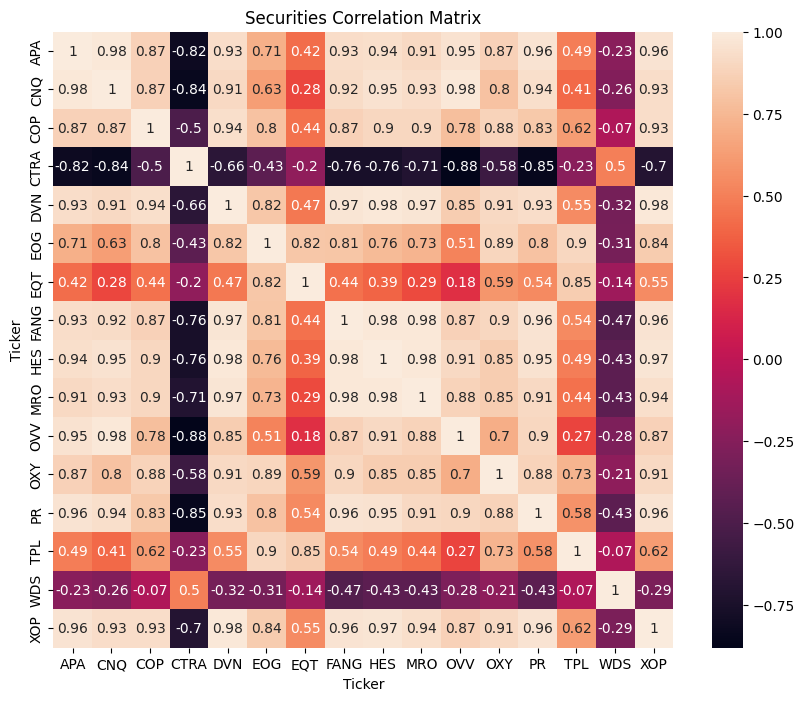

In [8]:
#Atempting to create the correlation matrix
corr_mat_vol = volatility.corr().round(2)
corr_mat_vol

plt.figure(figsize=(10,8))

#plt.set_properties(**{'font-size':'100pt'})
plot = sns.heatmap(corr_mat_vol.corr().round(2), annot = True)
plot.set_title("Securities Correlation Matrix")